In [14]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2)

In [3]:
# Preprocessing the Train set
training_set=train_datagen.flow_from_directory('D:/anaconda3/Machine_Learning/FlipRobo/Projects/Image Scraping and Classification Project/Train',
                                              target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical')


# Preprocessing the Test set
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('D:/anaconda3/Machine_Learning/FlipRobo/Projects/Image Scraping and Classification Project/Test',
                                                 target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical') 

Found 996 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


In [4]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step-1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',input_shape=[64,64,3]))

# Step-2 Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [11]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
32/32 [==============================] - 8s 220ms/step - loss: 0.2818 - accuracy: 0.8824 - val_loss: 0.2038 - val_accuracy: 0.9167
Epoch 2/15
32/32 [==============================] - 7s 208ms/step - loss: 0.2377 - accuracy: 0.8977 - val_loss: 0.2121 - val_accuracy: 0.9120
Epoch 3/15
32/32 [==============================] - 7s 210ms/step - loss: 0.2265 - accuracy: 0.9096 - val_loss: 0.1738 - val_accuracy: 0.9259
Epoch 4/15
32/32 [==============================] - 7s 222ms/step - loss: 0.2097 - accuracy: 0.9081 - val_loss: 0.2391 - val_accuracy: 0.8889
Epoch 5/15
32/32 [==============================] - 7s 231ms/step - loss: 0.2416 - accuracy: 0.8996 - val_loss: 0.2415 - val_accuracy: 0.9120
Epoch 6/15
32/32 [==============================] - 8s 235ms/step - loss: 0.2077 - accuracy: 0.9061 - val_loss: 0.1512 - val_accuracy: 0.9491
Epoch 7/15
32/32 [==============================] - 7s 223ms/step - loss: 0.1538 - accuracy: 0.9444 - val_loss: 0.1400 - val_accuracy: 0.9537
Epoch 

In [12]:
cnn.history.history

{'loss': [0.26064619421958923,
  0.2615688443183899,
  0.2119840532541275,
  0.22894203662872314,
  0.22933447360992432,
  0.21126459538936615,
  0.18348754942417145,
  0.19383451342582703,
  0.17708265781402588,
  0.17971794307231903,
  0.18553659319877625,
  0.15387941896915436,
  0.15795521438121796,
  0.16172172129154205,
  0.15165682137012482],
 'accuracy': [0.8965863585472107,
  0.8805220723152161,
  0.9146586060523987,
  0.904618501663208,
  0.9086345434188843,
  0.904618501663208,
  0.9257028102874756,
  0.922690749168396,
  0.9287148714065552,
  0.9257028102874756,
  0.9216867685317993,
  0.935742974281311,
  0.9427710771560669,
  0.9327309131622314,
  0.9427710771560669],
 'val_loss': [0.20376698672771454,
  0.21207141876220703,
  0.1738329529762268,
  0.2390599399805069,
  0.24147339165210724,
  0.15123051404953003,
  0.14000782370567322,
  0.22460639476776123,
  0.13210336863994598,
  0.13109304010868073,
  0.1115226298570633,
  0.13048666715621948,
  0.13373088836669922,
 

In [16]:
losses = pd.DataFrame(cnn.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.260646,0.896586,0.203767,0.916667
1,0.261569,0.880522,0.212071,0.912037
2,0.211984,0.914659,0.173833,0.925926
3,0.228942,0.904619,0.239060,0.888889
4,0.229334,0.908635,0.241473,0.912037
5,0.211265,0.904619,0.151231,0.949074
6,0.183488,0.925703,0.140008,0.953704
7,0.193835,0.922691,0.224606,0.893519
8,0.177083,0.928715,0.132103,0.958333
9,0.179718,0.925703,0.131093,0.953704


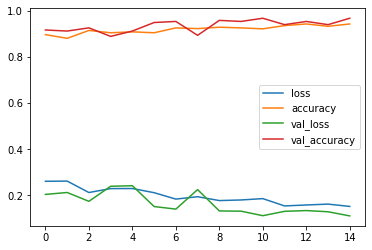

In [17]:
losses.plot()

In [18]:
# Save the model
cnn.save('image_classification.h5')